# EE379K: Lab 2
## Group Members: Irfan Hasan (ih3976), Peter Zhang (yz7724)

## Question 1

-------------1a--------------
-----Correlation coefficients from pandas-----

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000

------ Heatmap from Seaborn -------



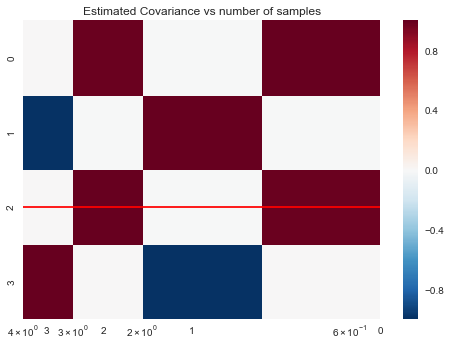


From the data it can be seen that the following columns are correlated: 
(0,2), (1,3)

--------- 1b ----------
Covariance matrix is the pairwise covariance between all the columns in the dataset

          0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168
The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.


--------- 1c ----------
Choosen covariance:
[[ 3.   0.   0. ]
 [ 0.   1.5  0.5]
 [ 0.   0.5  6. ]]



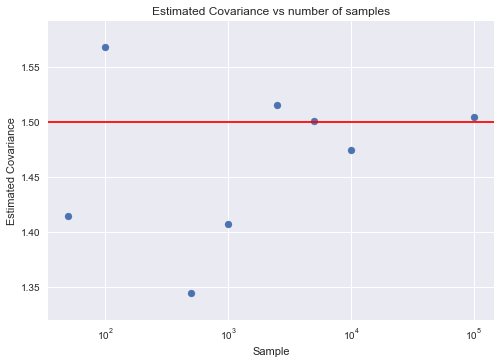

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('Lab2_Data/DF1')
df = df.drop(df.columns[[0]], axis=1) 
corr = df.corr()
print("-------------1a--------------")
print("-----Correlation coefficients from pandas-----\n")
print(corr)

print("\n------ Heatmap from Seaborn -------\n")
sns.heatmap(corr)
plt.show()

print("\nFrom the data it can be seen that the following columns are correlated: ")
print("(0,2), (1,3)\n")

print("--------- 1b ----------")
print("Covariance matrix is the pairwise covariance between all the columns in the dataset\n")
print(df.cov())
print("The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.\n")

print("\n--------- 1c ----------")
cov = [[3, 0, 0], [0, 1.5, 0.5], [0, 0.5, 6]]
print('Choosen covariance:\n{}\n'.format(np.matrix(cov)))
samples = [50, 100, 500, 1000, 2500, 5000, 10000, 100000]
res = []

for n in samples:
    sample = np.random.multivariate_normal([0,0,0], cov, n)
    estimated_cov = np.cov(sample, rowvar=False)
    res.append(estimated_cov[1][1])

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, res)
ax.set_xscale('log')
ax.set_title('Estimated Covariance vs number of samples')
plt.axhline(y=1.5, c='r')
plt.xlabel('Sample')
plt.ylabel('Estimated Covariance')
plt.show()

## Question 2

------ Original plot ------



/Users/irfanhasan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


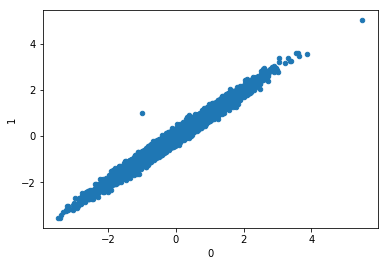


We used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.
We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.

----- Transformed plot ------



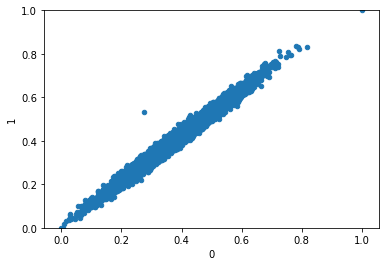

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

print('------ Original plot ------\n')
df2 = pd.read_csv('Lab2_Data/DF2')
df2 = df2.ix[:, 1:]
df2.plot.scatter(x='0', y='1')
plt.show()

scaler = MinMaxScaler()
df2_scale = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(data=df2_scale)

print('\nWe used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.')
print('We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.')
print('\n----- Transformed plot ------\n')
g = df2_scaled.plot.scatter(x=0, y=1)
g.set_ylim([0, 1])
plt.show()

## Question 3

In [1]:
import numpy as np

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

calc_std_dev(150)

0.24904452509546193

We can see that B_hat = -0.15 is not as significant since the empirical standard deviation of the error is much larger than 0.15, so the error accounts for all of it.

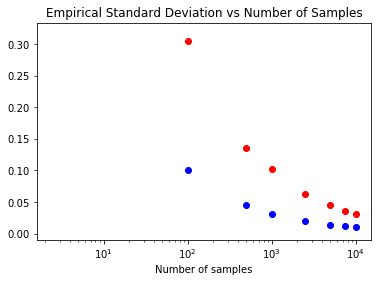

The fit is good.


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

samples =  [100, 500, 1000, 2500, 5000, 7500, 10000]
std_devs = []
one_over = []
for n in samples:
    std_dev = calc_std_dev(n)
    std_devs.append(std_dev)
    one_over.append(1/math.sqrt(n))

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, std_devs, c='r')
ax.scatter(samples, one_over, c='b')
ax.set_xscale('log')
ax.set_title('Empirical Standard Deviation vs Number of Samples')
plt.xlabel('Number of samples')
plt.show()
print('The fit is good.')

## Question 4

In [33]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Question4:
    def get_k_names(self, k, year):
        filename = "Names/yob" + str(year) + ".txt"
        data = pd.read_csv(filename, sep=",", header=None)
        print data.head(k)
        
    def name_frequency(self, name):
        m = 0
        f = 0
        for year in range(1880, 2016):
            filename = "Names/yob" + str(year) + ".txt"
            data = pd.read_csv(filename, sep=",", header=None)
            data = data[data[0] == name]
            for row in data.itertuples():
                if row[2] == 'M':
                    m += row[3]
                else:
                    f += row[3]

        print "For name " + name
        print "Male: "  + str(m)
        print "Female: " + str(f)
        
    def relative_frequency(self, name, year):
        filename = "Names/yob" + str(year) + ".txt"
        data = pd.read_csv(filename, sep=",", header=None)
        total = data[2].sum()
        data = data[data[0] == name]
        
        print "For year " + str(year)
        for row in data.itertuples():
            print "{0} {1} {2:.9f}".format(row[1], row[2], float(row[3])/total)
            
    def change_in_pop(self):
        result = set()
        names = dict(dict())  # {name : []}

        for year in range(1880, 2016):
            filename = "Names/yob" + str(year) + ".txt"
            data = pd.read_csv(filename, sep=",", header=None)

            for row in data.itertuples():
                if row[1] not in names:
                    names[row[1]] = {}
                if year not in names[row[1]]:
                    names[row[1]][year] = 0

                if row[2] == 'M':
                    names[row[1]][year] += row[3]
                else:
                    names[row[1]][year] -= row[3]

        for name, entries in names.iteritems():
            pos = neg = False
            for y in sorted(entries.iterkeys()):
                if entries[y] > 0 and neg:
                    result.add(name)
                    break
                elif entries[y] < 0 and pos:
                    result.add(name)
                    break
                elif entries[y] > 0:
                    pos = True
                elif entries[y]:
                    neg = True

        for n in result:
            print n
        
q4 = Question4()

Write a program that on input k and XXXX, returns the top k names from year XXXX

In [5]:
q4.get_k_names(5, 1996)

          0  1      2
0     Emily  F  25150
1   Jessica  F  24192
2    Ashley  F  23676
3     Sarah  F  21029
4  Samantha  F  20545


Write a program that on input Name returns the frequency for men and women of the name Name

In [9]:
q4.name_frequency('Bailey')

For name Bailey
Male: 20457
Female: 91648


Modify the above program to return relative frequency.

In [15]:
q4.relative_frequency('Bailey', 1996)

For year 1996
Bailey F 0.001149507
Bailey M 0.000425134


Find all names that used to be more popular for one gender, but then became more popular for another gender.

In [34]:
q4.change_in_pop()

Jojo
Kaegan
Artee
Elwyn
Armanni
Lean
Burnes
Leal
Sugar
Roche
Delane
Larsen
Rylin
Encarnacion
Bailey
Iyari
Paulie
Neylan
Jaazaniah
Andrean
Kelin
Danieal
Rayli
Vinci
Larken
Peniel
Mannon
Aubra
Casey
Eura
Gwynn
Micaiah
Braidyn
Shamonte
Apache
Shirley
Julani
Natale
Esosa
Jamere
Key
Konnar
Hien
Sherley
Shaughnessy
Noha
Cortlyn
Jaydn
Corbie
Marle
Brette
Tallie
Myan
Kearney
Kerrion
Tomie
Malachia
Mallie
Zennie
Loel
Marce
Khori
Ashay
Channin
Challis
Wren
Amanpreet
Daryen
Verl
Khamryn
Ge
Safi
Vero
Tavish
Shearl
Leelynn
Kinsey
Sandy
Challie
Freddi
Eddi
Vishva
Scottie
Danell
Christia
Domanique
Christie
Camdyn
Cotie
Claudy
Boots
Jaryn
Ayooluwa
Collins
Charly
Tiegan
Yancy
Algia
Algie
Tristen
Jazzman
Vannie
Terin
Hailey
Emmanuelle
Gabreil
Charle
Raynell
Oney
Tyjae
Miccah
Jamaine
Lesile
Sitha
Deshonte
Elis
Jamine
Clarion
Shantez
Tippy
Ferrari
Willett
Vergil
Azure
Shammah
Yuki
Destyn
Shaquelle
Dominique
Zi
Kayde
Montrese
Corrigan
Xian
Khanh
Meddie
Sharan
Jewell
Adyn
Sher
Allie
Kehinde
Tashawn
Orian
As

Mikale
Terryn
Leshun
Branigan
Satya
Ronda
Adryan
Julianni
Na
Lamoine
Emanuelle
Kyante
Khilyn
Jette
Linkyn
Camren
Rorey
Shelby
Wandell
Kacyn
Eren
Finley
Adi
Samauri
Ilian
Tristin
Abriel
Madyx
Sagan
Shanton
Finnie
Taytem
Gwyn
Desi
Rosario
Beryle
Bird
Jaxyn
Kelcy
Cailen
Rael
Tayne
Sherrell
Montie
Tandy
Phoenixx
Carlin
Aziah
Carlie
Marvel
Kelyn
Wilmoth
Eddis
Taydem
Haben
Massie
Deonne
Haley
Kesley
Aliyan
Abell
Bralen
Bristen
Roshun
Halen
Taelin
Teygan
Shirrell
Tarron
Saylor
Jeylen
Rio
Estel
Ayan
Lennix
Jarie
Roshawn
Rhen
Karna
Estee
Manveer
Augie
Kadyn
Lennie
Esa
Domineque
Cameren
An
Elza
Hardeep
Benet
Dary
Reyhan
Bayan
Anik
Mendy
Leonides
Varnell
Jasmeet
Anner
Wadie
Courtenay
Siu
Dari
Ova
Lay
Anias
Anis
Dare
Asian
Arville
Verlen
Zy
Ariyan
Aley
Blakelee
Maciel
Vanny
Jovonne
Jireh
Corin
Olanda
Frankye
Skyland
Jahnai
Blakeley
Keylen
Trevis
Martell
Danyal
Ronne
Carlas
Rashon
Kippy
Lajuan
Melvis
Shandon
Chrisna
Jaydynn
Lyrix
Shawndale
Arion
Arvie
Lyric
Cleo
Juneau
Dylin
Lyrik
Undra
Jari
Haram


Shaddai
Shawon
Kennyatta
Tanny
Elisha
Cailean
Ju
Beverley
Chisom
Trinell
Asante
Fiori
Nehal
Kendel
Asonte
Devonne
Emory
Lejeune
Shola
Johnel
Hermie
Maui
Kiante
Vee
Daniell
Nico
Kindle
Mosie
Veo
Vel
Omotayo
Kire
Garrie
Hue
Britian
Sherril
Notnamed
Xyion
Bennette
Salud
Dali
Rickie
Masami
Akon
Akili
Tobbie
Arshia
Leny
Memphis
Aeon
Seraphim
Novel
Zacari
Austyn
Dorrian
Evian
Selby
Jayce
Braxlee
Hilery
Nyia
Hiawatha
Machel
Darcel
Lanny
Mackinley
Macey
Yacine
Jailin
Talma
Leigh
Jourdin
Emon
Collen
Reiley
Aldyn
Adryn
Lequan
Jaquese
Nicoli
Jaylien
Irby
Videl
Neko
Perryn
Zaryn
Celester
Elim
Veral
Dashel
Byrl
Blaike
Waldean
Sunnie
Yannis
Ferrin
Byrd
Lovell
Omega
Harmeet
Haize
Solace
Plumer
Graysen
Lovely
Oddie
Paycen
Brittain
Yi
Bryne
Dezzie
Romell
Gale
Ya
Kauri
Shamire
Kamoni
Lynden
Jahdai
Lyndel
Mycah
Zyaire
Aalijah
Ijah
Jahara
Yu
Laray
Shoney
Omani
Jarae
Quetzal
Alexiz
Joen
Nissan
Thuong
Stirling
Emery
Alexis
Corren
Garcia
Raydell
Kahlin
Alexie
Lamari
Marrion
Tahje
Marlowe
Shelley
Jhai
Myrle
C

## Question 5

Tutorial by Dataquest

In [4]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [5]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

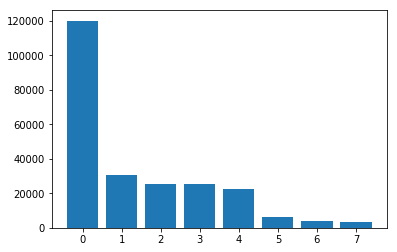

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [7]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

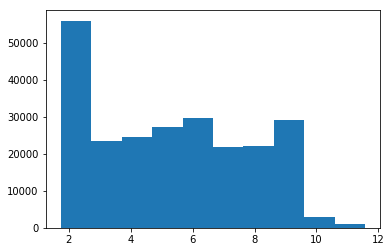

In [8]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

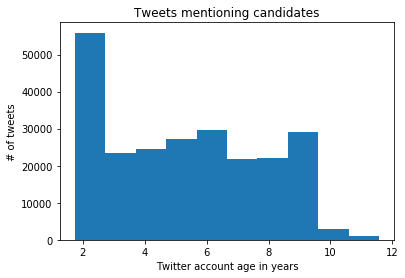

In [9]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

/Users/peter_zhang/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


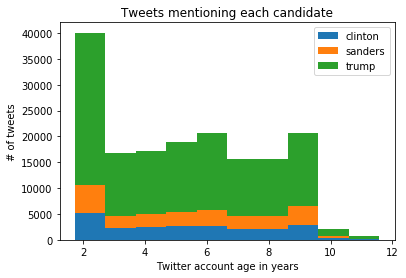

In [10]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

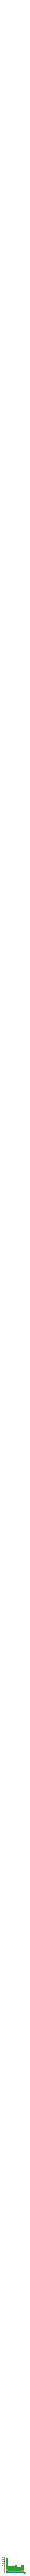

In [12]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

In [30]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

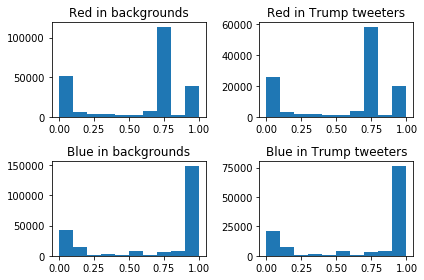

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [32]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
5470A8         1
00AEFF         1
C49C4B         1
778877         1
09380E         1
09536E         1
3D3C3D         1
48394D         1
3D3C3A         1
140C0E         1
AE1BCF         1
EBE39B         1
056785         1
FCF3EA         1
2E332F         1
FCF7F8         1
FCF7F7         1
0F6B2C         1
1D1F1B         1
180018         1
2686B3         1
8F0E8F         1
CCD4E8         1
FFEF42         1
08F5F5         1
4E5254         1
42373E         1
272D29        

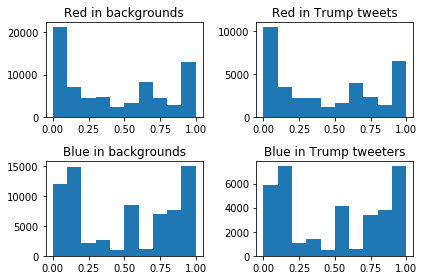

In [33]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

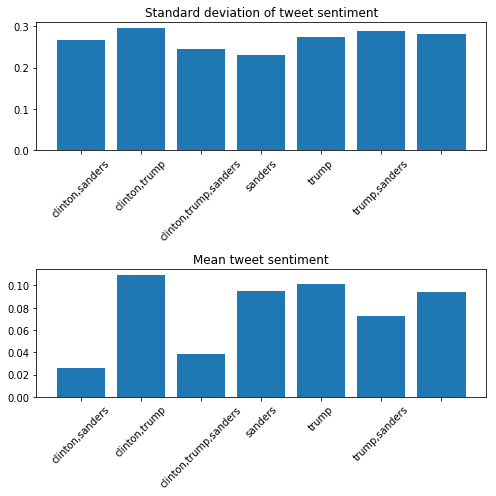

In [34]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [38]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

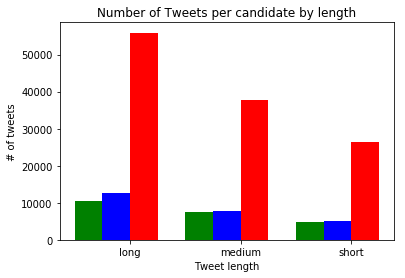

In [39]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

Aggregate the results by state.

In [14]:
'''
Adding to the filters for each state will increaes the number of captures
'''

filters = [
    ['al', 'alabama'],
    ['ak', 'alska'],
    ['az', 'arizona'],
    ['ar', 'arkansas'],
    ['ca', 'cali', 'california'],
    ['co', 'colorado'],
    ['ny'],
    ['pa', 'pittsburgh'],
    ['tx', 'texas', 'austin', 'houstin'],
    ['va', 'virginia'],
    ['wv'],
    ['wy']]

def get_state(row):
    result = []    
    location = str(row).lower().split(' ')
    
    found = False
    for word in location:
        found = False
        for f in filters:
            for addr in f:
                if addr == word:
                    found = True
                    result.append(f[0])
                    break
            if found:
                break
        if found:
            break        
    
    if found == False:
        result.append('N/A')
    
    return ",".join(result)

tweets["state"] = tweets['user_location'].apply(get_state)

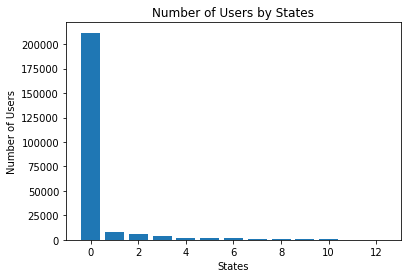

N/A    211669
ca       8394
tx       6164
ny       3632
pa       1644
az       1562
va       1523
co       1323
al        809
ar        359
wv        310
ak         74
wy         17
Name: state, dtype: int64


In [15]:
counts = tweets['state'].value_counts()
plt.bar(range(len(counts)), counts)
plt.title("Number of Users by States")
plt.xlabel("States")
plt.ylabel("Number of Users")
plt.show()

print (counts)